In [1]:
import pandas as pd
import numpy as np
from cv_py import CrossValidation
from dataloading import DataLoader
from scipy.sparse import coo_matrix, csr_matrix

In [3]:
%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


In [13]:
dl = DataLoader()
user_item_co = dl.import_agco('CO', 'df')
user_item_po = dl.import_agco('PO', 'df')

In [92]:
user_item_pod_loc_dealer = user_item_po.user.unique()
user_item_cod_loc_dealer = user_item_co.user.unique()

In [198]:
podl_ratings = user_item_po.purchases.describe()
codl_ratings = user_item_co.purchases.describe()
pd.DataFrame([podl_ratings, codl_ratings], index=['podl_ratings', 'codl_ratings'])

,count,mean,std,min,25%,50%,75%,max
podl_ratings,1569498.0,8.351542,23.022059,1.0,1.0,2.0,5.0,190.0
codl_ratings,1836702.0,7.868889,20.065218,1.0,1.0,2.0,5.0,150.0


In [197]:
user_item = user_item_co
user_item['user'] = pd.Categorical(user_item.user).codes
user_item['item'] = pd.Categorical(user_item['item']).codes
user_item_coo = coo_matrix((user_item.purchases, (user_item.user, user_item['item'])))
user_item_csr_co = user_item_coo.tocsr()


user_item = user_item_po
user_item['user'] = pd.Categorical(user_item.user).codes
user_item['item'] = pd.Categorical(user_item['item']).codes
user_item_coo = coo_matrix((user_item.purchases, (user_item.user, user_item['item'])))
user_item_csr_po = user_item_coo.tocsr()

C:\Users\781110~1\AppData\Local\Temp/ipykernel_3540/2161643085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_item['user'] = pd.Categorical(user_item.user).codes
C:\Users\781110~1\AppData\Local\Temp/ipykernel_3540/2161643085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_item['item'] = pd.Categorical(user_item['item']).codes
C:\Users\781110~1\AppData\Local\Temp/ipykernel_3540/2161643085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [95]:
po_items_per_user = user_item_po.groupby(by=['user']).count()
co_items_per_user = user_item_co.groupby(by=['user']).count()

po_users_per_item = user_item_po.groupby(by=['item']).count()
co_users_per_item = user_item_co.groupby(by=['item']).count()

In [96]:
podl_upi = po_users_per_item.user.describe()
codl_upi = co_users_per_item.user.describe()
podl_ipu = po_items_per_user['item'].describe()
codl_ipu = co_items_per_user['item'].describe()
pd.DataFrame([podl_upi, codl_upi, podl_ipu, codl_ipu], index=['podl_upi', 'codl_upi', 'podl_ipu', 'codl_ipu'])

,count,mean,std,min,25%,50%,75%,max
podl_upi,227824.0,6.884446,13.897926,1.0,1.0,2.0,6.00,267.0
codl_upi,258398.0,7.052597,15.156893,1.0,1.0,2.0,6.00,287.0
podl_ipu,287.0,5464.954704,7115.661449,1.0,1718.0,3502.0,6367.00,54409.0
codl_ipu,292.0,6241.017123,7470.930569,173.0,2229.5,4219.5,7203.25,52207.0


In [97]:
sparsity_po = 1-(user_item_po.shape[0] / (user_item_po.user.nunique() * user_item_po['item'].nunique()))
sparsity_co = 1-(user_item_co.shape[0] / (user_item_co.user.nunique() * user_item_co['item'].nunique()))
nnz_po = len(user_item_po)
nnz_co = len(user_item_co)
nouser_po = user_item_po.user.nunique()
nouser_co = user_item_co.user.nunique()
noitem_po = user_item_po.item.nunique()
noitem_co = user_item_co.item.nunique()
co = [nouser_co, noitem_co, nnz_co, sparsity_co]
po = [nouser_po, noitem_po, nnz_po, sparsity_po]
pd.DataFrame([co, po], index=['co', 'po'], columns=['nouser', 'noitem', 'nnz', 'sparsity'])

,nouser,noitem,nnz,sparsity
co,292,258398,1822377,0.975847
po,287,227824,1568442,0.976012


In [210]:
user_item_co.item.nunique()

258437

In [17]:
import seaborn as sns
sns.set_theme()

In [48]:
plt.rcParams['text.usetex'] = True

In [72]:
plt.rcParams['text.usetex']

True

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
plt.style.use('seaborn-paper')

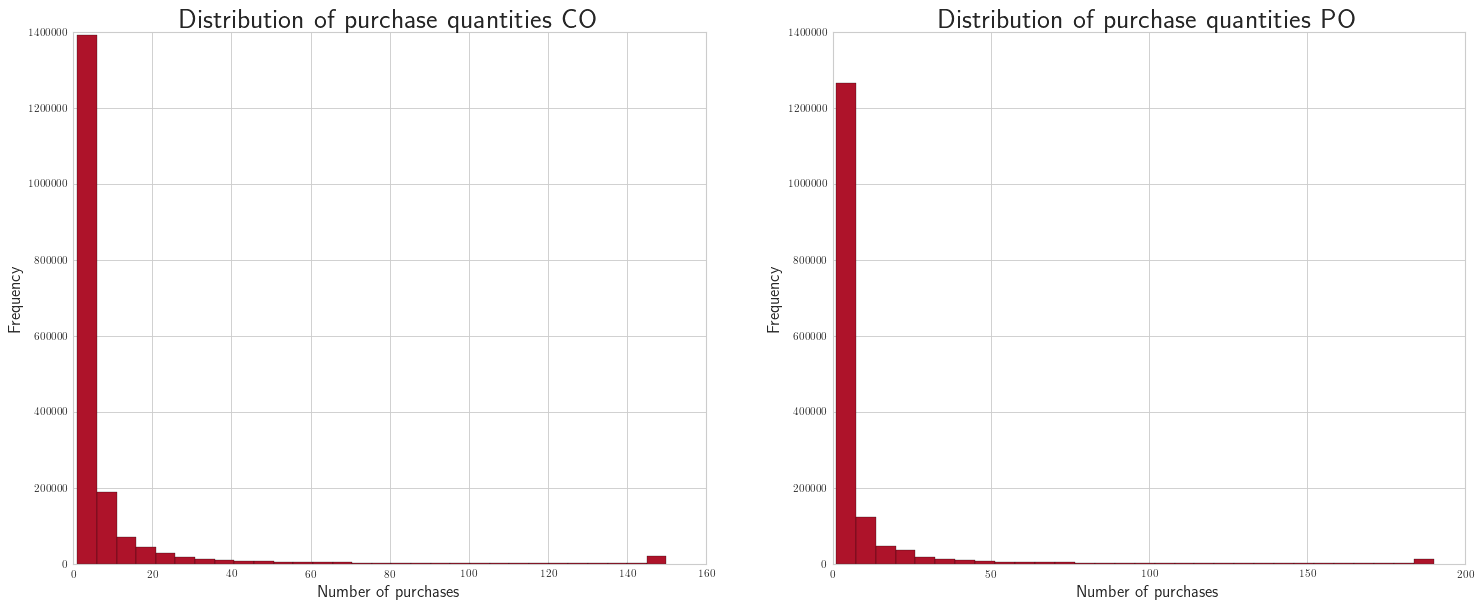

In [73]:
# Creating histogram
fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)
#ax.hist(pd.Series(user_item_csr_po.data), color='#ae132a', alpha=1)
ax[0].hist(user_item_co.purchases, color='#ae132a', alpha=1, bins=30)
ax[0].set_title('Distribution of purchase quantities CO', fontsize=25)
ax[0].set_xlabel('Number of purchases', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[0].tick_params(axis='both', which='minor', labelsize=10)

ax[1].hist(user_item_po.purchases, color='#ae132a', alpha=1, bins=30)
ax[1].set_title('Distribution of purchase quantities PO', fontsize=25)
ax[1].set_xlabel('Number of purchases', fontsize=15)
ax[1].set_ylabel('Frequency', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
plt.savefig('histogram.svg')
# Show plot

plt.show()


In [213]:
mtrx_dict_co = user_item_csr_co.T.todok()
xy_co = np.array(list(mtrx_dict_co.keys()))
vals_co = np.array(list(mtrx_dict_co.values()))

mtrx_dict_po = user_item_csr_po.T.todok()
xy_po = np.array(list(mtrx_dict_po.keys()))
vals_po = np.array(list(mtrx_dict_po.values()))

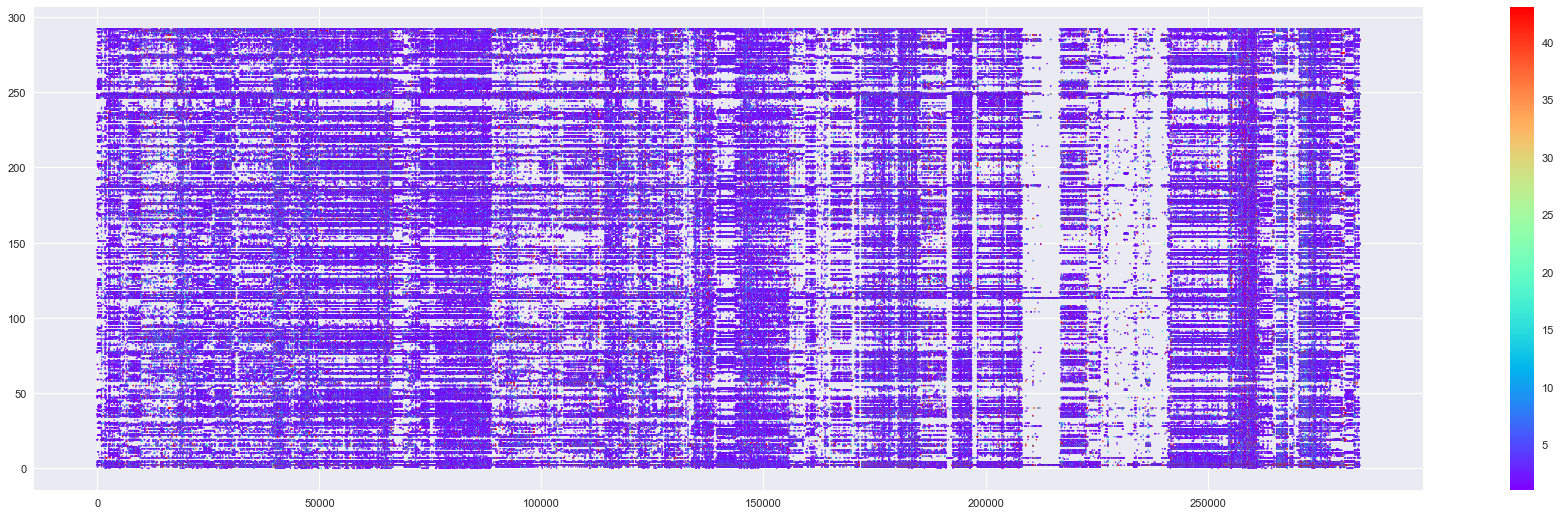

In [214]:
#co data scatterplot
plt.figure(figsize=(28, 8), dpi=80)
plt.scatter(xy_co[:,0], xy_co[:,1], s=1, c=vals_co, cmap='rainbow')
plt.colorbar()
plt.show()

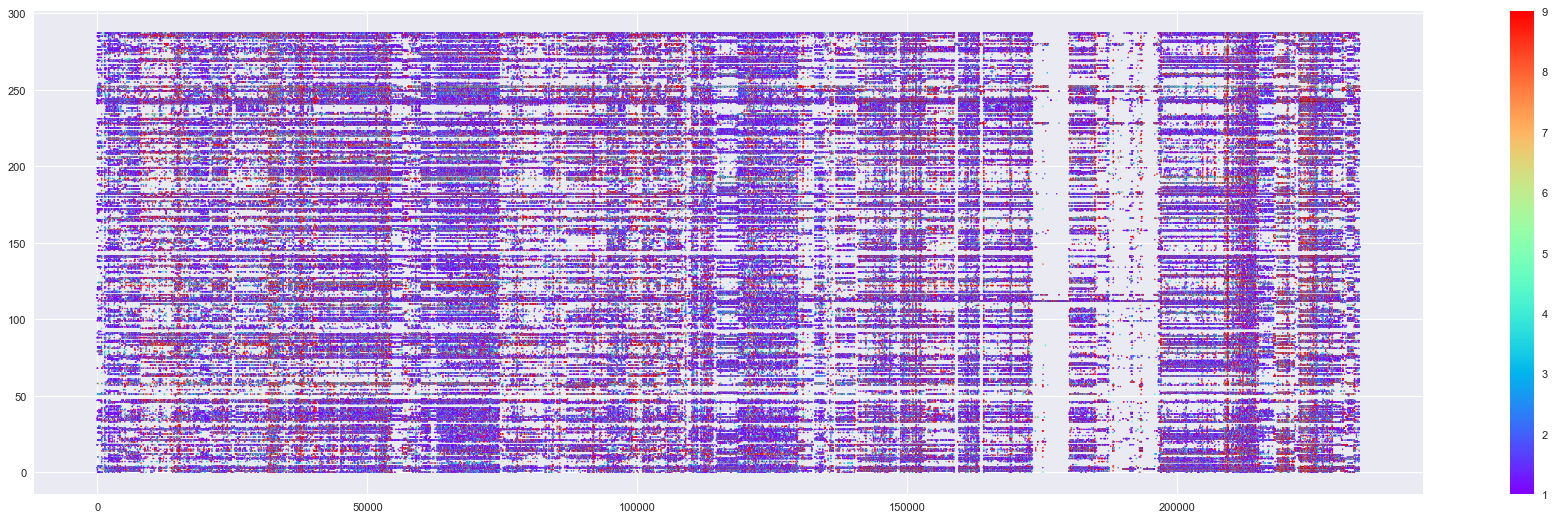

In [208]:
# create a scatter plot
plt.figure(figsize=(28, 8), dpi=80)
plt.scatter(xy_po[:,0], xy_po[:,1], s=1, c=vals_po, cmap='rainbow')
plt.colorbar()
plt.show()